# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city "http://api.openweathermap.org/data/2.5/weather?"
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         # Make the API request
        response = requests.get(city_url)
        
        # Check if the request was successful
        if response.status_code == 200:
            
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | nemuro
Processing Record 3 of Set 1 | kafin hausa
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | itamaraca
Processing Record 8 of Set 1 | tolanaro
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | zhangatas
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | yarmouth
Processing Record 16 of Set 1 | taiohae
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | bambari
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | hun
Processing Record 23 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,10.85,87,100,2.06,CA,1723164310
1,nemuro,43.3236,145.5750,19.86,95,100,4.22,JP,1723164311
2,kafin hausa,12.2375,9.9080,24.95,80,100,4.58,NG,1723164312
3,kingston,17.9970,-76.7936,30.53,66,20,7.20,JM,1723164313
4,utrik,11.2278,169.8474,28.22,80,83,7.92,MH,1723164315


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,10.85,87,100,2.06,CA,1723164310
1,nemuro,43.3236,145.5750,19.86,95,100,4.22,JP,1723164311
2,kafin hausa,12.2375,9.9080,24.95,80,100,4.58,NG,1723164312
3,kingston,17.9970,-76.7936,30.53,66,20,7.20,JM,1723164313
4,utrik,11.2278,169.8474,28.22,80,83,7.92,MH,1723164315


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

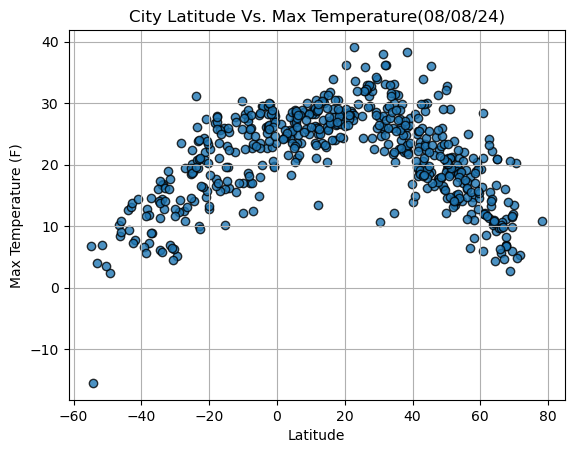

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

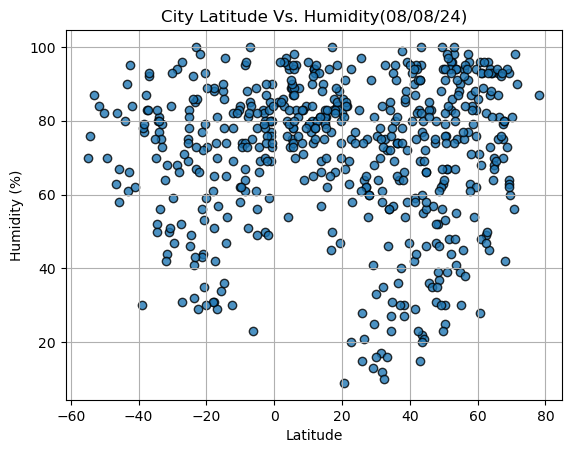

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

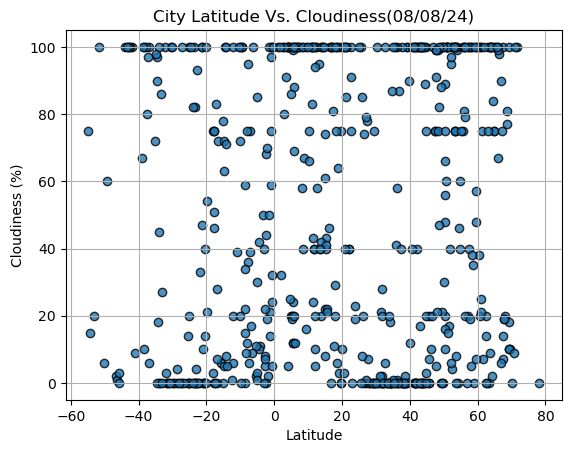

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

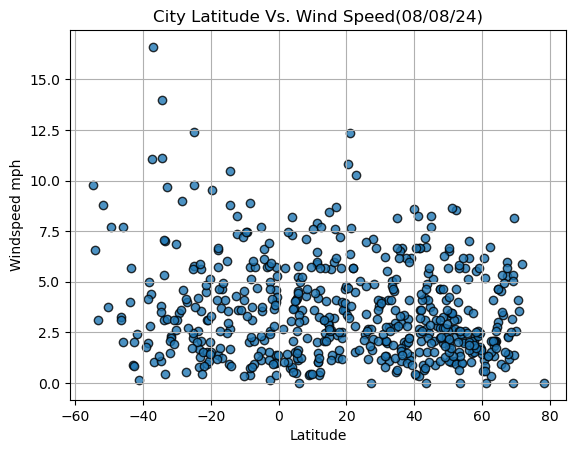

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):

    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,10.85,87,100,2.06,CA,1723164310
1,nemuro,43.3236,145.5750,19.86,95,100,4.22,JP,1723164311
2,kafin hausa,12.2375,9.9080,24.95,80,100,4.58,NG,1723164312
3,kingston,17.9970,-76.7936,30.53,66,20,7.20,JM,1723164313
4,utrik,11.2278,169.8474,28.22,80,83,7.92,MH,1723164315


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port elizabeth,-33.9180,25.5701,14.50,81,0,3.09,ZA,1723164316
6,itamaraca,-7.7478,-34.8256,26.03,81,36,3.75,BR,1723164317
7,tolanaro,-25.0319,46.9987,20.04,83,20,9.77,MG,1723164115
8,port-aux-francais,-49.3500,70.2167,2.44,70,60,7.68,TF,1723164319
10,papatowai,-46.5619,169.4708,10.12,63,2,3.28,NZ,1723164322


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6782152240242083


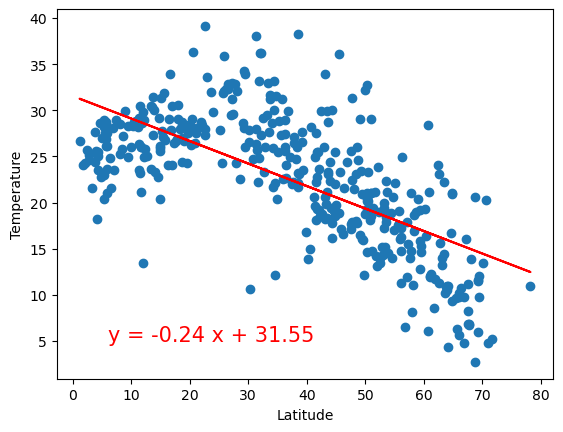

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.ylabel("Temperature")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,5))

The r-squared is: 0.7705919441688832


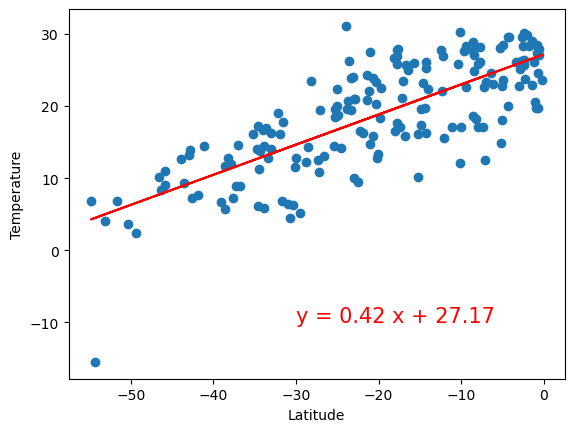

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.ylabel("Temperature")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,-10))

**Discussion about the linear relationship:** For the northern hemisphere, as latitude increases, temperature decreases.  For the southern hemisphere, as latitude increases, temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.08572191842022105


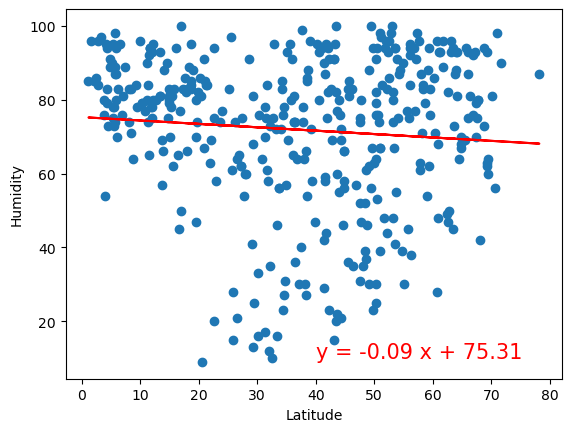

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.015427835028755447


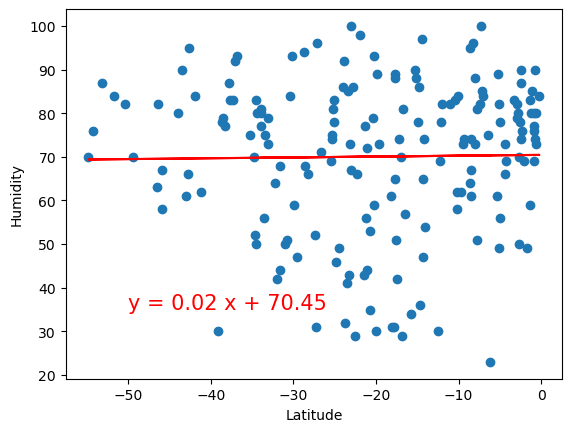

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (-50,35))

**Discussion about the linear relationship:** As latitude increases for both hemispheres, there does not seem to be a correlation to humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.03895631028670486


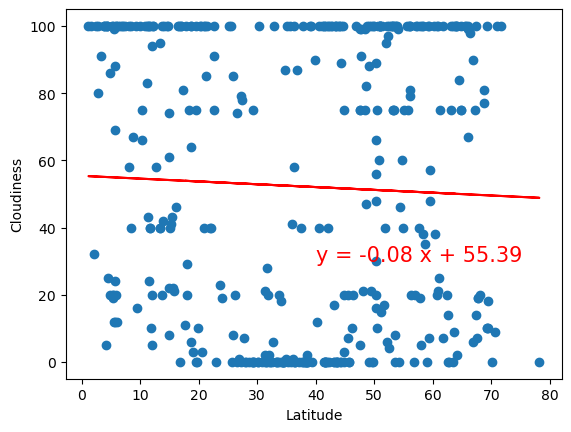

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,30))

The r-squared is: -0.07440303582416531


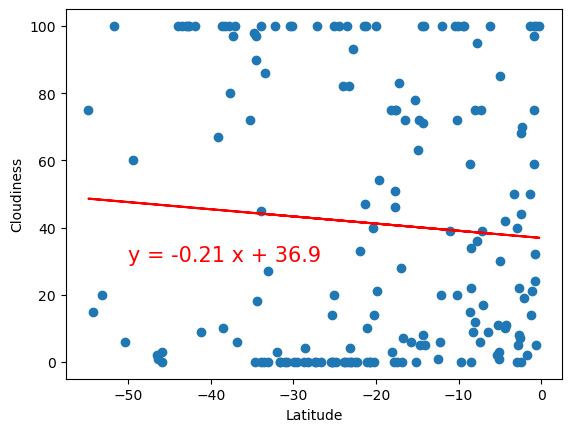

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-50,30))

**Discussion about the linear relationship:** As latitude increases for both hemispheres, there seems to be a slightly negative correlation to cloudiness.  As latitude increases, cloudiness slightly decreases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.12328005454005396


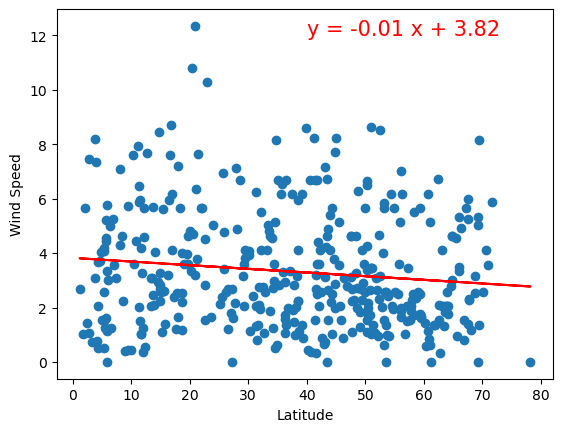

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,12))

The r-squared is: -0.13690566279834854


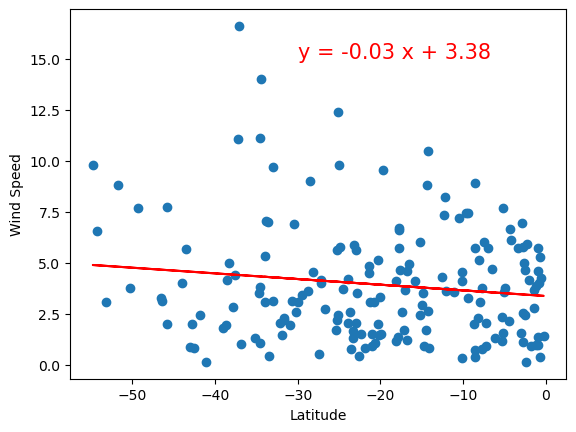

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,15))

**Discussion about the linear relationship:** As latitude increases for both hemispheres, there seems to be a slightly negative correlation to wind speed.  As latitude increases, wind speed slightly decreases.